# Programming Assignment 2
## Goals
- Understand the Sampling Theorem using image signals.
- Implement Sampling & Decimation and Interpolation of discrete-time signals.
- Understand the Aliasing and its effects
## Problems
1. Apply Downsampling to an Image
2. Apply Upsampling to the Downsampled Image
3. Avoid aliasing with Low-Pass Filter
4. Repeat Steps 1 and 2 to the Band-Limited Image

In [11]:
# import libraries
import cv2 # OpenCV for image processing
import matplotlib.pyplot as plt # Matplotlib for plotting images
import numpy as np # NumPy for numerical operations

In [ ]:
def conv_vertical(image, kernel):
    H, W, C = image.shape
    result = image.copy()
    for i in range(H):
        for c in range(C):
            result[i, :, c] = np.convolve(image[i, :, c], kernel, mode='same')
    return result

def conv_horizontal(image, kernel):
    H, W, C = image.shape
    result = image.copy()
    for j in range(W):
        for c in range(C):
            result[:, j, c] = np.convolve(image[:, j, c], kernel, mode='same')
    return result

def conv2d(image, kernel):
    H, W, C = image.shape
    temp = np.zeros_like(image)
    result = np.zeros_like(image)
    for i in range(H):
        for c in range(C):
            temp[i, :, c] = np.convolve(np.convolve(image[i, :, c], kernel, mode='same'), kernel, mode='same')
    for j in range(W):
        for c in range(C):
            result[:, j, c] = np.convolve(np.convolve(temp[:, j, c], kernel, mode='same'), kernel, mode='same')
    return result

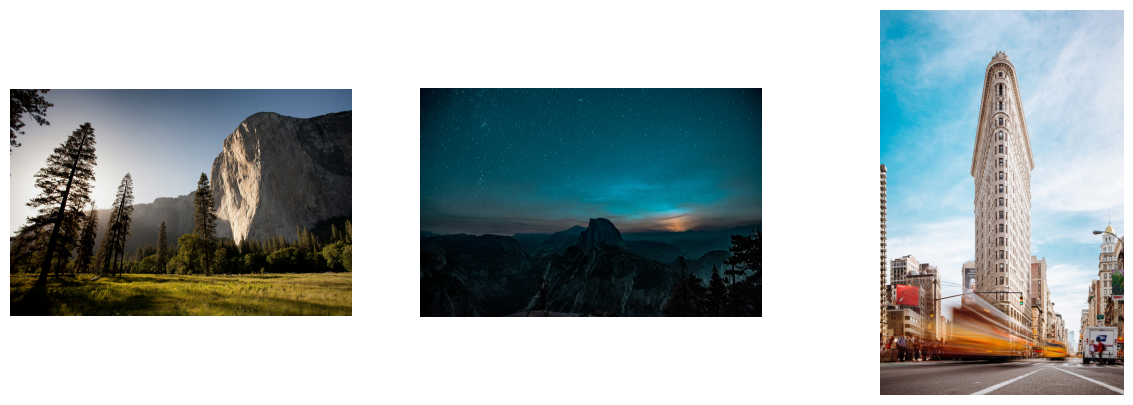

In [2]:
# set number of images
NUM_IMAGES = 3

# load the images and convert them to RGB format
image_set = [cv2.imread(f'./image/{i}.jpg') for i in range(1, 1 + NUM_IMAGES)]
image_set = list(map(lambda img: cv2.cvtColor(img, cv2.COLOR_BGR2RGB), image_set))

plt.figure(figsize=(15, 5))
for i, image in enumerate(image_set):
    plt.subplot(1, NUM_IMAGES, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

## 1. Apply Downsampling to an Image
- Apply impulse-train sampling to an image.
- Perform decimation to reduce the image resolution

### Apply impulse-train sampling

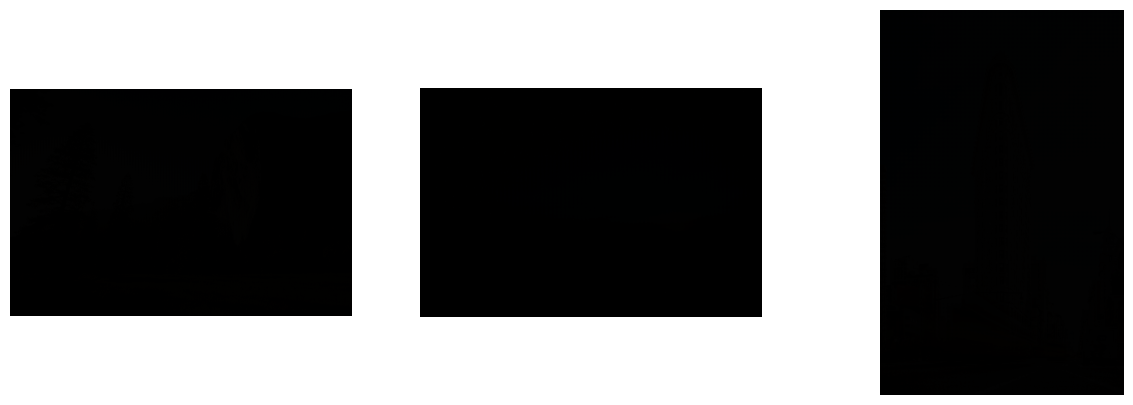

In [4]:
# Sampling constants
SAMPLING_N = 10

# Sampling function
def impulse_function(input, x, y, N, channel=1):
    return input if x % N == 0 and y % N == 0 else [0] * channel
    
def sample_image(image, N):
    height, width, channels = image.shape
    sampled_image = image.copy()
    for i, row in enumerate(image):
        for j, pixel in enumerate(row):
            sampled_image[i, j] = impulse_function(pixel, i, j, N, channels)
    return sampled_image


sampled_image_set = [sample_image(image, SAMPLING_N) for image in image_set]

plt.figure(figsize=(15, 5))
for i, image in enumerate(sampled_image_set):
    plt.subplot(1, NUM_IMAGES, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

Since the pictures above are black because those resolution is to big. So I will zoom in those pictures.

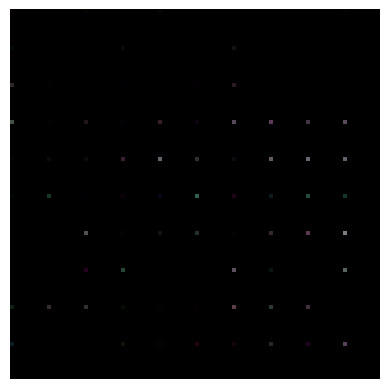

In [5]:
plt.figure()
plt.imshow(sampled_image_set[0][300:400, 300:400])
plt.axis('off')
plt.show()

### Perform decimation to reduce the image resolution

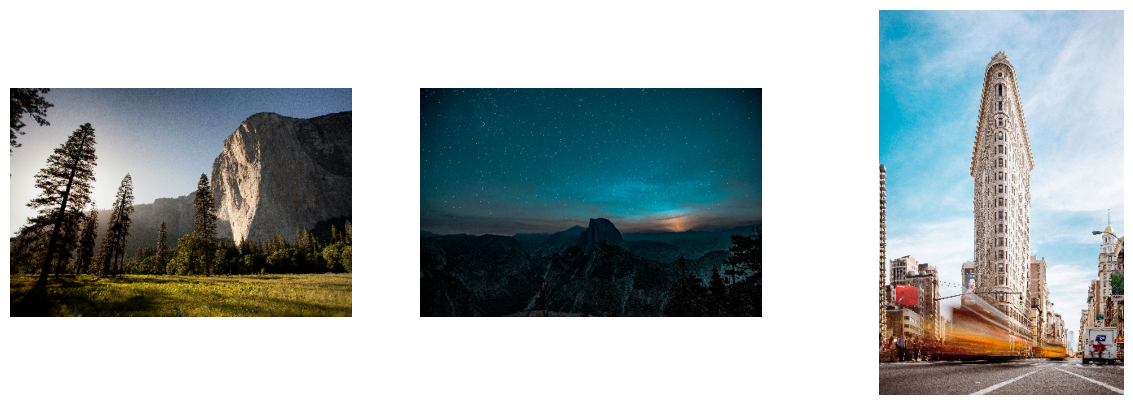

In [7]:
def decimation(image, N):
    return image[::N, ::N]

decimated_image_set = [decimation(image, SAMPLING_N) for image in image_set]

plt.figure(figsize=(15, 5))
for i, image in enumerate(decimated_image_set):
    plt.subplot(1, NUM_IMAGES, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

## 2. Apply Upsampling to the Downsampled Image
- Reconstruction the image using **nearest-neighbor interpolation**.
- Design **bilinear interpolation** using 2D convolution.
- Compare the results of two interpolation methods and discuss the result.

### Reconstruction the image using **nearest-neighbor interpolation**

In [19]:
def nearest_neighbor_kernel(N):
    return np.array([1] * N + [0] * N, dtype=np.uint8)

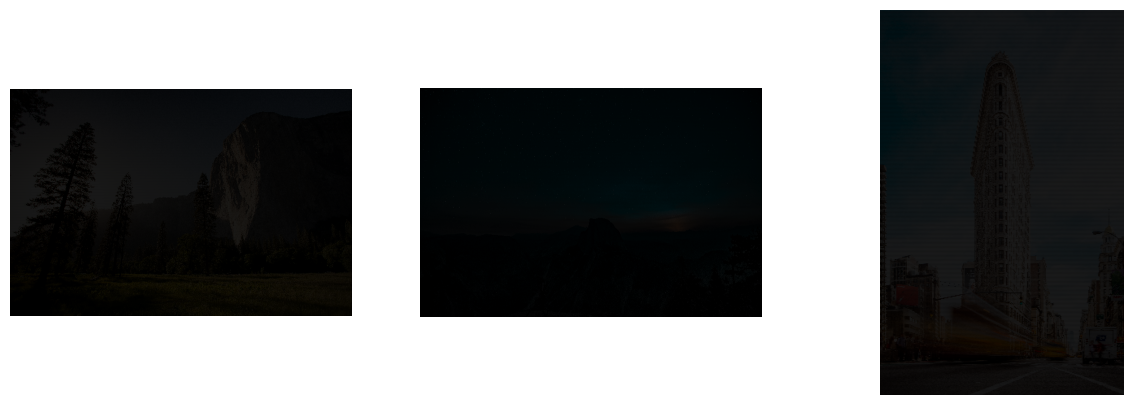

In [20]:
nearest_neighbor_1d_vertical_image_set = [conv_vertical(image, nearest_neighbor_kernel(SAMPLING_N)) for image in sampled_image_set]

plt.figure(figsize=(15, 5))
for i, image in enumerate(nearest_neighbor_1d_vertical_image_set):
    plt.subplot(1, NUM_IMAGES, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()


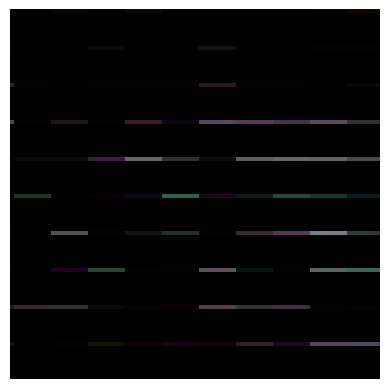

In [21]:
plt.figure()
plt.imshow(nearest_neighbor_1d_vertical_image_set[0][300:400, 300:400])
plt.axis('off')
plt.show()

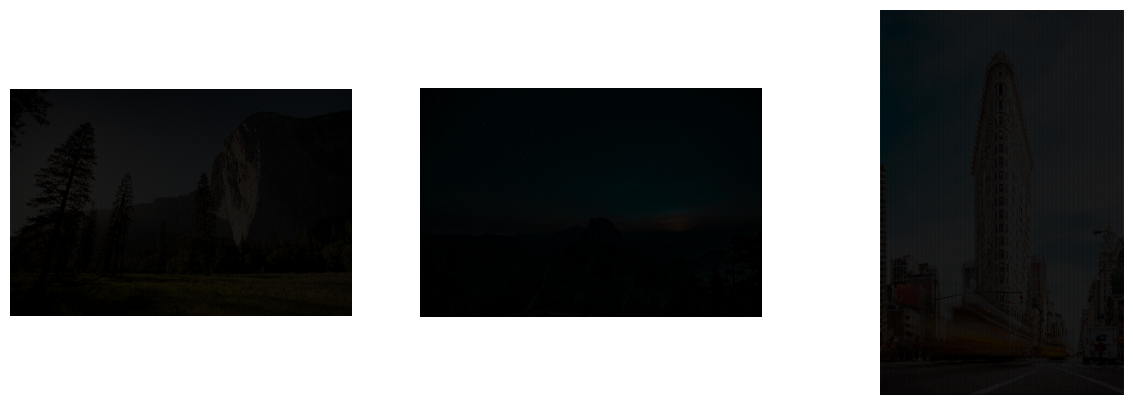

In [24]:
nearest_neighbor_1d_horizontal_image_set = [conv_horizontal(image, nearest_neighbor_kernel(SAMPLING_N)) for image in sampled_image_set]

plt.figure(figsize=(15, 5))
for i, image in enumerate(nearest_neighbor_1d_horizontal_image_set):
    plt.subplot(1, NUM_IMAGES, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

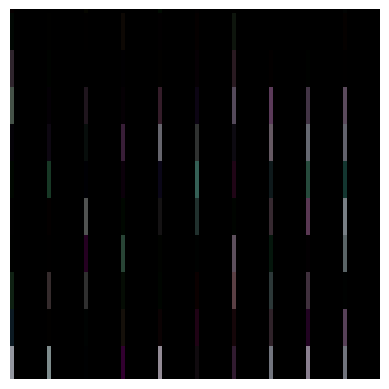

In [25]:
plt.figure()
plt.imshow(nearest_neighbor_1d_horizontal_image_set[0][300:400, 300:400])
plt.axis('off')
plt.show()

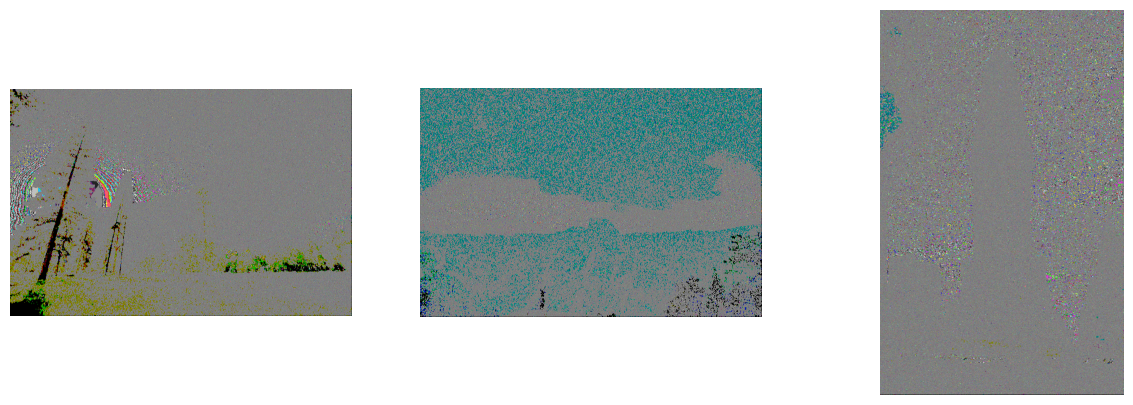

In [30]:
nearest_neighbor_2d_image_set = [conv2d(image, nearest_neighbor_kernel(SAMPLING_N)) for image in sampled_image_set]

plt.figure(figsize=(15, 5))
for i, image in enumerate(nearest_neighbor_2d_image_set):
    plt.subplot(1, NUM_IMAGES, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

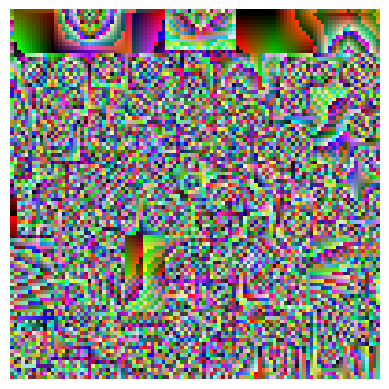

In [28]:
plt.figure()
plt.imshow(nearest_neighbor_2d_image_set[0][300:400, 300:400])
plt.axis('off')
plt.show()

## 3. Avoid aliasing with a Low-Pass Filter
- Since the original image is typically not band-limited, apply a low-pass filter before downsampling.
- This make the image approximately band-limited, reducing aliasing artifacts.

## 4. Repeat Step 1 and 2 to the Band-Limited Image.
- Apply downsampling and interpolation method.
- Compare and discuss the result.